# Producción de cemento - Solución

<b><i style="font-size:13px">Tags: </i></b><i style="font-size:11px">Inventario</i>

In [1]:
import os
# Por precaución, cambiamos el directorio activo de Python a aquel que contenga este notebook
if "optimizacion" in os.listdir():
    os.chdir(r"optimizacion/Formulaciones/5. Produccion de cemento/")

## Enunciado

<!--  
Conjuntos: $Conjunto$
Indices: $indice \in Conjunto$
Parámetros/variables: $parametro_{ij}$
Tablas: En HTML y los textos de elementos del conjunto en la parte izquierda con alineado a la izquierda. Además a cada tabla se le pone un nombre y su respectiva descripción.
-->

Artos S.A. es una empresa dedicada a la producción de cemento que cuenta con una única planta en la ciudad de Barranquilla. La empresa debe determinar la cantidad de toneladas de cemento a producir en cada una de las siguientes 12 semanas. Los costos de producción, costos de almacenamiento, así como la demanda y el precio por tonelada de cemento, varían semana a semana y se presentan en la siguiente tabla.

<p style="text-align: center;"><b>Tabla 1. Estructura de costos y precio</b></p>

|Semana|Costo de producción \[Miles de COP/ton\]|Costo de almacenamiento \[Miles de COP/ton\]|Demanda \[ton\]|Precio \[Miles de COP/ton\]|
|:---:|:---:|:---:|:---:|:---:|
|1|172.8|6.9|95,000|432.0|
|2|178.7|7.2|99,750|440.6|
|3|174.6|8.0|104,738|449.5|
|4|181.4|8.9|109,974|458.4|
|5|183.0|9.0|109,974|467.6|
|6|177.7|7.8|109,974|477.0|
|7|182.8|6.7|120,972|486.5|
|8|186.8|7.3|120,972|496.2|
|9|181.8|7.8|108,875|506.2|
|10|178.3|8.8|97,987|516.3|
|11|173.4|9.2|78,390|526.6|
|12|168.8|8.4|94,068|537.1|

Tenga en cuenta que, al inicio de la planeación, se cuenta con 12,000 toneladas de cemento y que, por especificaciones de la maquinaria, no se puede producir más de 110,000 toneladas ni menos de 85,000 toneladas en una semana cualquiera. El objetivo de Artos S.A. es maximizar su utilidad.

## Formulación

<!--  
Enumeración alfabetica y en negrilla. En caso de que hayan subliterales, estos van identados, en negrilla y se utiliza "i.", "ii.", ... 
Ejemplo:
**a.**
    **i.**
    **ii.**
**b.**
-->

**a.** Formula matemáticamente un modelo de optimización de forma general que represente la
situación anterior. Defina clara y rigurosamente:  
- Conjuntos
- Parámetros
- Variables de decisión
- Restricciones
- Naturaleza de las variables
- Función objetivo

### Conjuntos

- $S$: Conjunto de semanas

### Parámetros

- $d_{i}$: demanda de la semana $i\in S$
- $p_{i}$: precio por tonelada de cemento en la semana $i\in S$
- $c_i$: costo de producir una tonelada de cemento en la semana $i\in S$
- $h_i$: costo de almacenamiento de una tonelada de cemento en la semana $i\in S$
- $I_0$: inventario inicial de toneladas de cemento

### Variables de decisión

- $x_{i}$: toneladas de cemento a producir en la semana $i\in S$
- $I_i$: toneladas de cemento que se tienen en inventario al final de la semana $i\in S$

### Restricciones

Se deben respetar los límites de producción:

$$
\begin{align*}
x_i&\leq 110000, &&\forall i \in S;\\
x_i&\geq 85000, &&\forall i \in S;\\
\end{align*}
$$

Restricción que contabiliza el inventario de cada semana:

$$
\begin{align*}
I_1&=I_0+x_1-d_1;\\
I_i&=I_{i-1}+x_i-d_i,  &&\forall i \in S|i\ge 1;
\end{align*}
$$

### Naturaleza de las Variables

Solo pueden producirse y almacenarse cantidades positivas de cemento:

$$
\begin{align*}
x_i&\geq 0,&&\forall i \in S;\\
I_i&\geq 0,&&\forall i \in S;
\end{align*}
$$

### Función objetivo

Debe maximizarse la utilidad.

$$
    \operatorname{máx}\ \sum_{i\in S}p_{i}d_{i} - c_{i}x_{i} - h_{i}I_{i}.
$$

Ya que los ingresos no dependen de las variables de decisión, minimizar los costos es equivalente.

$$
    \operatorname{mín}\ \sum_{i\in S}c_{i}x_{i} + h_{i}I_{i}.
$$

## Implementación

**b.** Resuelve el modelo planteado utilizando la librería de PuLP en Python. ¿Cuál es la solución óptima del problema? 

### Librerías

Importa el módulo `matplotlib.pyplot` para crear gráficas y la librería `pulp` para crear y resolver el modelo.

In [14]:
import matplotlib.pyplot as plt
import pulp as lp

### Conjuntos

Define el conjuntos `S` que representa las semanas del horizonte de planeación.

Recuerda que por conveniencia de preservar el orden de los elementos de los conjuntos, no siempre deberás definirlos con el tipo `set`.

In [3]:
# Semanas
S = list(range(1, 13))

### Parámetros

Define o importa los parámetros del modelo.

In [4]:
# Costo de producción por tonelada en la semana i in S
c = {
    1: 172.8,
    2: 178.7,
    3: 174.6,
    4: 181.4,
    5: 183.0,
    6: 177.7,
    7: 182.8,
    8: 186.8,
    9: 181.8,
    10: 178.3,
    11: 173.4,
    12: 168.8,
}

# Costo de almacenamiento por tonelada en la semana i in S
h = {
    1: 6.9,
    2: 7.2,
    3: 8.0,
    4: 8.9,
    5: 9.0,
    6: 7.8,
    7: 6.7,
    8: 7.3,
    9: 7.8,
    10: 8.8,
    11: 9.2,
    12: 8.4,
}

# Demanda de la semana i in S
d = {
    1: 95000,
    2: 99750,
    3: 104738,
    4: 109974,
    5: 109974,
    6: 109974,
    7: 120972,
    8: 120972,
    9: 108875,
    10: 97987,
    11: 78390,
    12: 94068,
}

# Precio por tonelada en la semana i in S
p = {
    1: 432.0,
    2: 440.6,
    3: 449.5,
    4: 458.4,
    5: 467.6,
    6: 477.0,
    7: 486.5,
    8: 496.2,
    9: 506.2,
    10: 516.3,
    11: 526.6,
    12: 537.1,
}

# Inventario inicial de toneladas de cemento
I0 = 12000

### Objeto del modelo

Construye un problema al que luego agregarás las restricciones y la función objetivo.

In [5]:
problema = lp.LpProblem(name="inventarios", sense=lp.LpMaximize)

### Variables de decisión

Define las variables del problema de manera que estén contenidas en diccionarios indexados en los conjuntos de sus variables respectivas.

In [6]:
# Toneladas de cemento a producir en cada semana
x = {
    i: lp.LpVariable(
        name=f"produccion_{i}", lowBound=0, upBound=None, cat=lp.LpContinuous
    )
    for i in S
}

# Toneladas de cemento en inventario al final de cada semana
I = {
    i: lp.LpVariable(
        name=f"inventario_{i}", lowBound=0, upBound=None, cat=lp.LpContinuous
    )
    for i in S
}

### Función objetivo

Agrega al problema la función objetivo. Recuerda que al definir el problema, ya definiste si este es de maximización o minimización.

In [7]:
problema += (
    sum(d[i] * p[i] - x[i] * c[i] - I[i] * h[i] for i in S),
    "utilidad_total",
)

### Restricciones

Agrega al problema las restricciones del modelo.

In [8]:
# Se garantiza que se respeten los limites de producción
for i in S:
    problema += x[i] <= 110000, f"produccion_max_{i}"
    problema += x[i] >= 85000, f"produccin_min_{i}"

# Contabilizar los inventarios de cada semana
problema += I[1] == I0 + x[1] - d[1], "inventario_semana_1"
for i in S:
    if i > 1:
        problema += I[i] == I[i - 1] + x[i] - d[i], f"inventario_semana_{i}"

### Resolver el problema

Invoca el optimizador. Este paso le asigna un valor a las variables incluidas en las restricciones o función objetivo del modelo.

In [9]:
problema.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  6 2022 

command line - cbc /tmp/a2923ffd22404ecf825033030c2b7b98-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/a2923ffd22404ecf825033030c2b7b98-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 41 COLUMNS
At line 125 RHS
At line 162 BOUNDS
At line 163 ENDATA
Problem MODEL has 36 rows, 24 columns and 59 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 4 (-32) rows, 16 (-8) columns and 19 (-40) elements
0  Obj -1.8735107e+08 Primal inf 180613.97 (4)
4  Obj -2.2239275e+08
Optimal - objective value -2.2239275e+08
After Postsolve, objective -2.2239275e+08, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective -222392746.5 - 4 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



1

### Imprimir resultados

Antes de estudiar el óptimo del modelo, identifica en el estado del optimizador si pudo resolver el problema.

In [10]:
f"Estado del optimizador: {lp.LpStatus[problema.status]}"

'Estado del optimizador: Optimal'

Identifica también el valor de la función objetivo.

In [11]:
f"Utilidad total: {lp.value(problema.objective)}"

'Utilidad total: 380356850.79999995'

Por último, imprime de manera estructurada el valor de las variables de decisión y otras expresiones de interés.

In [12]:
print("Semana", "Producción (ton)", "Inventario (ton)", sep="\t")
for i in S:
    print(i, f"{lp.value(x[i]): .2f}", f"{lp.value(I[i]): .2f}", sep="\t")

Semana	Producción (ton)	Inventario (ton)
1	 89354.00	 6354.00
2	 110000.00	 16604.00
3	 110000.00	 21866.00
4	 110000.00	 21892.00
5	 110000.00	 21918.00
6	 110000.00	 21944.00
7	 110000.00	 10972.00
8	 110000.00	 0.00
9	 108875.00	 0.00
10	 97987.00	 0.00
11	 85000.00	 6610.00
12	 87458.00	 0.00


### Visualizar resultados

Ahora que conoces el valor de las variables de decisión, desarrolla las siguientes visualizaciones del resultado.

Desarrolla una gráfica que ilustre el nivel de inventario final a lo largo del horizonte de planeación.

[]

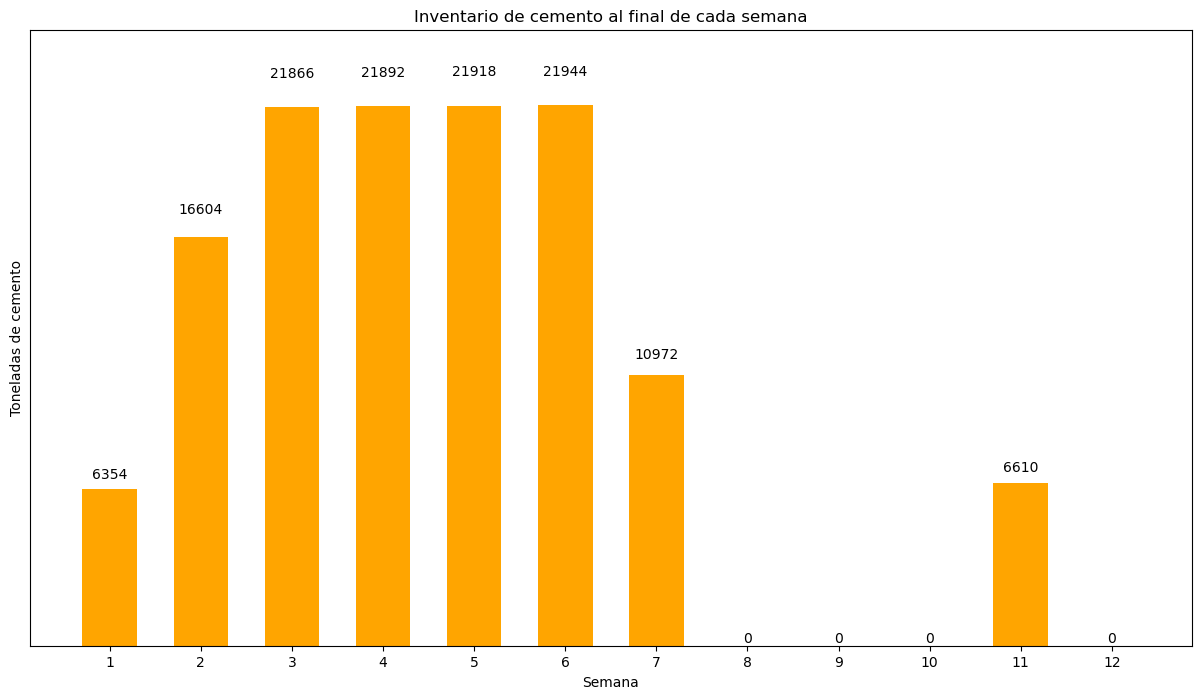

In [19]:
# Listas de producción, inventario final e inventario inicial de cada semana
Prod = [lp.value(x[i]) for i in S]
Inv_F = [lp.value(I[i]) for i in S]
Inv_I = [I0] + Inv_F[:-1]

# Gráfica inventario final de cada semana
fig2, ax3 = plt.subplots(figsize=(15, 8))

# Añadir barras a la gráfica
rects2 = ax3.bar(S, Inv_F, width=0.6, tick_label=S, color="orange")

# Etiquetar cada barra con toneladas de cemento en inventario
for rect in rects2:
    height = rect.get_height()
    ax3.text(
        rect.get_x() + rect.get_width() / 2.0,
        1.05 * height,
        "%d" % int(height),
        ha="center",
        va="bottom",
    )

# Título de la gráfica
ax3.set_title("Inventario de cemento al final de cada semana")

# Etiqueta eje x
ax3.set_xlabel("Semana")

# Etiqueta eje y
ax3.set_ylabel("Toneladas de cemento")

# Rango eje y
ax3.set_ylim([0, 25000])

# Remover dígitos del eje y
ax3.set_yticks([])

Desarrolla una gráfica que ilustre el nivel de producción a lo largo del horizonte de planeación.

[]

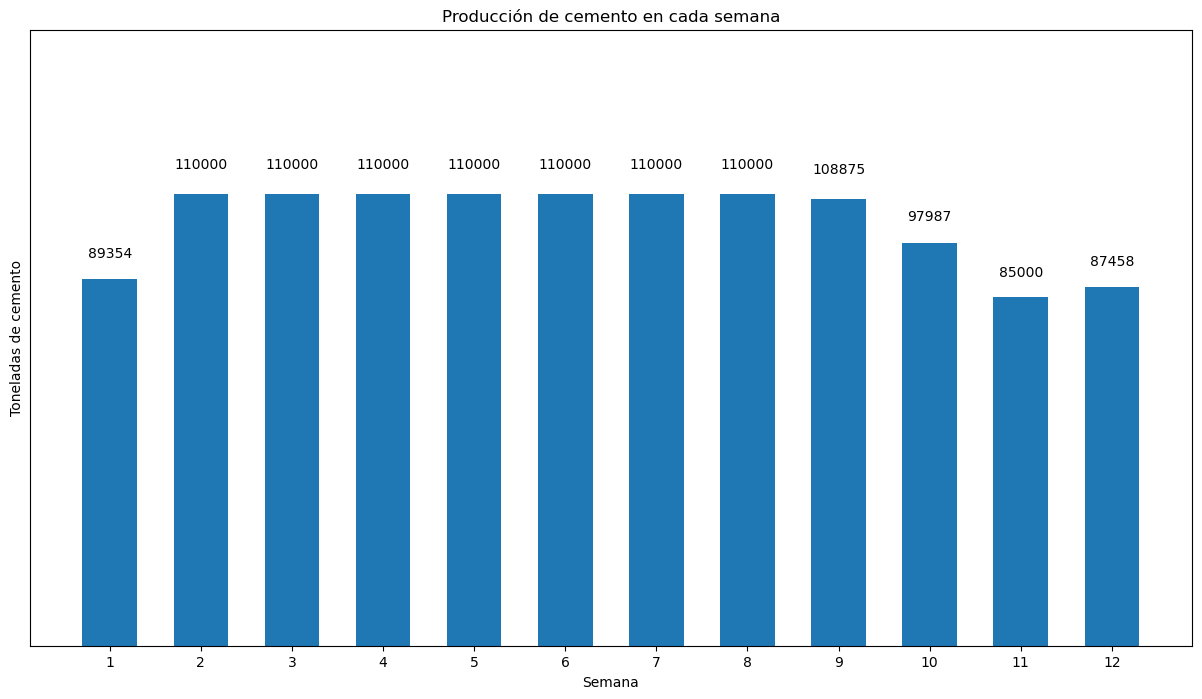

In [17]:
# Gráfica del plan de producción
fig1, ax2 = plt.subplots(figsize=(15, 8))

# Añadir barras a la gráfica
rects1 = ax2.bar(S, Prod, width=0.6, tick_label=S)

# Añadir los labels a cada barra con las toneladas de cemento producidas
for rect in rects1:
    height = rect.get_height()
    ax2.text(
        rect.get_x() + rect.get_width() / 2.0,
        1.05 * height,
        "%d" % int(height),
        ha="center",
        va="bottom",
    )

# Añadir el titulo de la gráfica
ax2.set_title("Producción de cemento en cada semana")

# Etiqueta eje x
ax2.set_xlabel("Semana")

# Etiqueta eje y
ax2.set_ylabel("Toneladas de cemento")

# Rango eje y
ax2.set_ylim([0, 150000])

# Remover dígitos del eje y
ax2.set_yticks([])

Desarrolla una gráfica que ilustre el nivel de inventario inicial, la producción y la demanda a lo largo del horizonte de planeación.

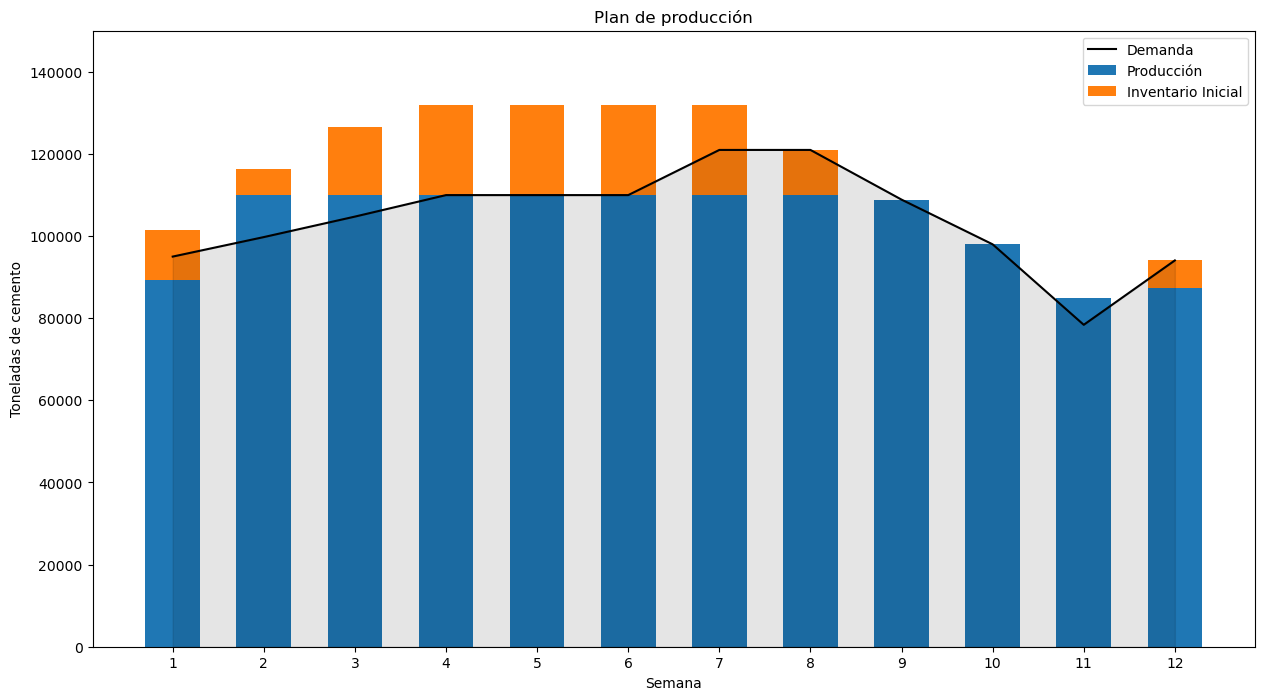

In [16]:
# Gráfica del plan de producción, demanda e inventario al inicio de cada semana
fig3, ax1 = plt.subplots(figsize=(15, 8))

# Añadir las barras de producción a la gráfica
p1 = ax1.bar(S, Prod, width=0.6, tick_label=S)

# Añadir las barras de inventario inicial a la gráfica
p2 = ax1.bar(S, Inv_I, bottom=Prod, width=0.6, tick_label=S)

# Añadir una línea a la gráfica que represente la demanda
l1 = ax1.plot(S, d.values(), color="black")

# Rellenae el área bajo la curva de demanda
ax1.fill_between(S, d.values(), color="black", alpha=0.1)

# Título de la gráfica
ax1.set_title("Plan de producción")

# Etiqueta eje x
ax1.set_xlabel("Semana")

# Etiqueta eje y
ax1.set_ylabel("Toneladas de cemento")

# Rango eje y
ax1.set_ylim([0, 150000])

# Etiquetas de cada componente de la gráfica
ax1.legend((l1[0], p1[0], p2[0]), ("Demanda", "Producción", "Inventario Inicial"))


## Créditos

Equipo Principios de Optimización<br>
Autores: Camilo Aguilar, Juan Felipe Rengifo<br>
Desarrollo: Camilo Aguilar, Juan Felipe Rengifo, Alejandro Mantilla<br>
Última fecha de modificación: 07/04/2023